In this notebook I use lsa with count vectors to create 3 topics. I also looked at the explained variance for each topic and tried to distinguish what each topic was clustered around.

In [2]:
from collections import defaultdict

from __future__ import print_function

import matplotlib.pyplot as plt
from nltk.corpus import stopwords

import numpy as np
import pandas as pd

import pickle

In [3]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.feature_extraction import text 
from gensim.utils import simple_preprocess

In [8]:
#Reads in a csv, drops Unnamed column, tokenizes, removes reviews that are 10 words or less and creates
#modelling text column with the tokens.
df = pd.read_csv('tokenized_text')

df.drop(columns = 'Unnamed: 0', inplace = True)

df['tokens'] = df['text'].apply(simple_preprocess)

df = df[(df.tokens.str.len() > 10)]

df['modeling_text'] = df['tokens'].apply(lambda x:' '.join(x))

In [9]:
df.head()

,useful,text,tokens,length,modeling_text
0,0,I was in the area running errands with my mom....,"[was, in, the, area, running, errands, with, m...",731,was in the area running errands with my mom we...
1,0,We had to try this place after hearing all the...,"[we, had, to, try, this, place, after, hearing...",195,we had to try this place after hearing all the...
2,0,Good quick burgers not sure about all the hype...,"[good, quick, burgers, not, sure, about, all, ...",115,good quick burgers not sure about all the hype...
3,1,"Always hot, fresh, and delicious. This is the ...","[always, hot, fresh, and, delicious, this, is,...",295,always hot fresh and delicious this is the bur...
4,0,There is not a cleaner and healthier burger pl...,"[there, is, not, cleaner, and, healthier, burg...",380,there is not cleaner and healthier burger plac...


In [10]:
#Cast the modeling_text to a variable
example = df['modeling_text']

In [1]:
#Takes a df of word counts and threshold for number of times a word appears and returns a dataframe with
#containing the number of times each word appears. This is useful for adding custom stop words.
def common_words(df_word_count, n):
    df_word_count = df_word_count.T.reset_index()
    df_word_count['Word Total']= df_word_count.iloc[1:,-3558:-1].sum(axis=1)
    common_words = df_word_count[df_word_count['Word Total'] > n]
    return common_words

In [11]:
#Adding custom stop words
stopword = set(stopwords.words('english'))

stopword = stopword.union(set(['food', 'this', 'place', 'the', 'of', 'is', 'came', 'was', 'for', 'have', 'had'
                           ,'and', 'get', 'one', 'food', 'guy','?','!','place', 'good', 'fries','burger', 'burgers',
                            'got', 'eat','great', 'us', 'asked', 'service', 'back', 'time', 'like', 'vegas', 'go',
                            'try', 'animal', 'style', 'double', 'good', 'just', 'always', 'location', 'fresh',
                              'east', 'coast', 'order', 'ordered', 'fast']))

In [12]:
#Converts the modeling text to a count of the words using CountVectorizer
vectorizer = CountVectorizer(min_df = 1, stop_words = stopword)
dtm = vectorizer.fit_transform(example)  # dtm: Document-Term Matrix
df_word_count = pd.DataFrame(dtm.toarray(), index=example, columns=vectorizer.get_feature_names())

In [102]:
vectorizer.get_feature_names()

['aaaand',
 'abandon',
 'abandoned',
 'abandoning',
 'abducted',
 'abend',
 'abends',
 'aber',
 'aberration',
 'abheolt',
 'abhor',
 'ability',
 'able',
 'ably',
 'abordable',
 'abraham',
 'abseits',
 'absence',
 'absolute',
 'absolutely',
 'absoluter',
 'absolutes',
 'absolutly',
 'absorb',
 'absoulute',
 'abstained',
 'abstinence',
 'absurd',
 'absurdly',
 'abt',
 'abundance',
 'ac',
 'accent',
 'accents',
 'accentuating',
 'accept',
 'acceptable',
 'access',
 'accessed',
 'accessibility',
 'accessible',
 'accessories',
 'accidentally',
 'accommodate',
 'accommodated',
 'accommodating',
 'accomodating',
 'accompanied',
 'accompaniment',
 'accompany',
 'accomplished',
 'according',
 'accordingly',
 'account',
 'accounts',
 'accoutrements',
 'accross',
 'accuracy',
 'accurate',
 'accurately',
 'accustom',
 'accustomed',
 'ace',
 'aces',
 'ache',
 'achieve',
 'aching',
 'acknowledge',
 'acknowledgement',
 'acquire',
 'acquired',
 'act',
 'acted',
 'acting',
 'action',
 'active',
 'activ

In [13]:
# Fit LSA. Use algorithm = “randomized” for large datasets 
num_topics = 20
lsa = TruncatedSVD(num_topics, algorithm = 'randomized')
dtm_lsa = lsa.fit_transform(dtm)

In [14]:
lsa.explained_variance_ratio_

array([0.0310366 , 0.01441809, 0.01062506, 0.00904157, 0.00826481,
       0.00774555, 0.00766182, 0.0074255 , 0.00714717, 0.00662281,
       0.00657406, 0.00640598, 0.00625244, 0.00590197, 0.00582135,
       0.00567055, 0.00555184, 0.00537618, 0.00514864, 0.00494785])

Text(0,0.5,'Explained Variance Ratio')

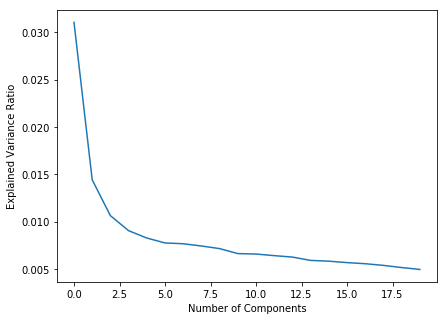

In [19]:
#Plotting number of topics against explained variance
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.plot(lsa.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')

In [75]:
#Extracting most common words for topic 1
pd.DataFrame(lsa.components_.round(5),index = ["1",'2', '3'],columns = vectorizer.get_feature_names()).T.sort_values(by='1', ascending=False)

,1,2,3
menu,0.18999,0.27129,-0.06480
really,0.16964,-0.04999,-0.22156
cheese,0.16599,0.37031,0.13977
well,0.15494,0.05211,-0.04845
would,0.14697,-0.06703,-0.19229
line,0.14443,-0.21669,0.22317
onions,0.14037,0.26768,0.17968
love,0.13951,-0.04057,0.04658
even,0.13824,-0.05810,-0.02172
people,0.13812,-0.10325,-0.01663


In [76]:
#Extracting most common words for topic 2
pd.DataFrame(lsa.components_.round(5),index = ["1",'2', '3'],columns = vectorizer.get_feature_names()).T.sort_values(by='2', ascending=False)

,1,2,3
cheese,0.16599,0.37031,0.13977
menu,0.18999,0.27129,-0.06480
grilled,0.11881,0.27123,0.17701
onions,0.14037,0.26768,0.17968
extra,0.10733,0.23946,0.12407
secret,0.10878,0.18233,-0.03152
meat,0.06825,0.13790,0.01095
lettuce,0.08192,0.11989,0.01288
ask,0.06837,0.10948,0.06887
want,0.08667,0.09869,0.03822


In [77]:
#Extracting most common words for topic 3
pd.DataFrame(lsa.components_.round(5),index = ["1",'2', '3'],columns = vectorizer.get_feature_names()).T.sort_values(by='3', ascending=False)

,1,2,3
drive,0.13058,-0.18951,0.47977
thru,0.08973,-0.14073,0.37801
line,0.14443,-0.21669,0.22317
onions,0.14037,0.26768,0.17968
grilled,0.11881,0.27123,0.17701
cheese,0.16599,0.37031,0.13977
long,0.10894,-0.13198,0.13904
extra,0.10733,0.23946,0.12407
wait,0.11350,-0.14372,0.10386
inside,0.05603,-0.06622,0.08451


In [81]:
#Saving the topic probablilites of each review to a CSV
topic_probs = pd.DataFrame(dtm_lsa.round(5), index = example, columns = ['1','2', '3'])

topic_probs.reset_index().to_csv('lsi_topic_probs')


In [70]:
#This section was trying to extract reviews that had the highest probabilities to be in each topic.
#I wanted to look at them to see if there was an obvious difference between the 3.
text_1 = []
text_2 = []
text_3 = []
for i in range(len(topic_probs)):
    if topic_probs.iloc[i]['1'] > 8:
        text_1.append(topic_probs.iloc[i]['modeling_text'])
    elif topic_probs.iloc[i]['2'] > 5:
        text_2.append(topic_probs.iloc[i]['modeling_text'])
    if topic_probs.iloc[i]['3'] > 2:
        text_3.append(topic_probs.iloc[i]['modeling_text'])

In [73]:
text_1

['two all beef patties special sauce lettuce cheese wait minute this isn the golden arches this is much much better with tag line of quality you can taste you better deliver an amazing product and in out goes way beyond my expectations food stars this has to be one of if not the best tasting fast food burger in america the flavors of the cheese lettuce sauce and hamburger work so well together and the bun is just melt in your mouth double delicious the fries actually taste like fresh cut potatoes not that mashed together again fake fries lot of fast food joints serve my double double with animal style fries http www yelp com biz_photos qg_wegpa mbo dpuoktmlw select ft xeb ca neo swdiqw price stars fast food is suppose to be cheap when you start paying over for fast food meal for processed product that is not healthy for you something has gone wrong with america in out has very cheap reasonable prices for the quality of ingredients that they use when you actually taste their burgers you

In [43]:
import csv

with open("text_1","w",newline="") as f:  # open("output.csv","wb") for Python 2
    cw = csv.writer(f)
    cw.writerows(r for r in text_2)

In [34]:
text_1

<_io.BufferedWriter name='text_1'>

In [114]:
topic_probs

,1,2
modeling_text,,
was in the area running errands with my mom we were both hungry and it was around and asked her if we could stop here my mom and are on more healthy diet and coming here kind of threw us off but you know it would have been longer going home and preparing something ourselves don always have my mom pay for my food but without her saying anything had feeling she wanted to do it because had bought breakfast lunch and dinner for her several times within the last few weeks all spaced out of course it was great night because got to spend some quality time with just my mom truly enjoy it but the burgers are insane good and the fries well think they are healthier than mcdonalds or burger king,2.46095,0.53574
we had to try this place after hearing all the hype about it what let down the burger was so thin you could barely taste it and the fries were so bland and stale tasting would not recommend,1.10983,-0.48384
good quick burgers not sure about all the hype but just like every regional thing will definitely eat there again,0.87824,0.25165
always hot fresh and delicious this is the burger place to beat no one even comes close the milkshakes are worth the extra time must spend at the gym working them off the burgers are always incredible and love that you an order off menu so glad they are stone throw away,1.49144,0.07550
there is not cleaner and healthier burger place on this planet this guys are so busy that they are constantly rushing and when you talk to them it like being in fine dining restaurant how do they do it wow anyway very polite and they do everything to make this an memorable experience love in and out burgers that is the only place could eat burger and say wow,1.85751,-0.09805
hambúrguer extremamente delicioso grande por um preço muito barato cardápio propositalmente simples com poucas opções mas isso também um ponto positivo os funcionários são muito simpáticos ambiente bonito tipo lanchonete americana antiga amei tudo respeito desse lugar vale visita,0.00583,0.00136
can say that is one of my favourite burger it simple maded but delicous grilled cheese menns two slices of melted american cheese spread with onions on freshly baked bun is one of the secret menu marvelous you also can order double cheeseburger,1.42929,-0.84231
place is legit always friendly always fresh and always busy cheap too as far as fast food burgers go what else can you ask for,0.98398,1.25345
love in out every time go to vegas in out right way wished they would build one in albuquerque would go there non stop because its so gooooooooood the fries and burgers are soooo amazing if you re ever near one go and buy burger asap,1.42714,-0.35305


In [115]:
#Looking at cosine_similarity of the reviews to see if they are related in an obvious way.
from sklearn.metrics.pairwise import cosine_similarity
pd.DataFrame(cosine_similarity(dtm_lsa,dtm_lsa).round(6), columns =example, index = example)

modeling_text,was in the area running errands with my mom we were both hungry and it was around and asked her if we could stop here my mom and are on more healthy diet and coming here kind of threw us off but you know it would have been longer going home and preparing something ourselves don always have my mom pay for my food but without her saying anything had feeling she wanted to do it because had bought breakfast lunch and dinner for her several times within the last few weeks all spaced out of course it was great night because got to spend some quality time with just my mom truly enjoy it but the burgers are insane good and the fries well think they are healthier than mcdonalds or burger king,we had to try this place after hearing all the hype about it what let down the burger was so thin you could barely taste it and the fries were so bland and stale tasting would not recommend,good quick burgers not sure about all the hype but just like every regional thing will definitely eat there again,always hot fresh and delicious this is the burger place to beat no one even comes close the milkshakes are worth the extra time must spend at the gym working them off the burgers are always incredible and love that you an order off menu so glad they are stone throw away,there is not cleaner and healthier burger place on this planet this guys are so busy that they are constantly rushing and when you talk to them it like being in fine dining restaurant how do they do it wow anyway very polite and they do everything to make this an memorable experience love in and out burgers that is the only place could eat burger and say wow,hambúrguer extremamente delicioso grande por um preço muito barato cardápio propositalmente simples com poucas opções mas isso também um ponto positivo os funcionários são muito simpáticos ambiente bonito tipo lanchonete americana antiga amei tudo respeito desse lugar vale visita,can say that is one of my favourite burger it simple maded but delicous grilled cheese menns two slices of melted american cheese spread with onions on freshly baked bun is one of the secret menu marvelous you also can order double cheeseburger,place is legit always friendly always fresh and always busy cheap too as far as fast food burgers go what else can you ask for,love in out every time go to vegas in out right way wished they would build one in albuquerque would go there non stop because its so gooooooooood the fries and burgers are soooo amazing if you re ever near one go and buy burger asap,this place is awesome the experience is always enjoyable employees always friendly and the food is always great,...,this place is as good as it gets when you re craving some good old fashioned burgers and fries always packed both inside and at the drive thru but the workers are always super friendly and the food is always consistently good fast to come out and perfectly assembled burgers are amazing fries are delicious and definitely fresh cut and milkshakes are da bomb you also can beat the prices definitely our go to burger joint don think ll ever be able to live in town that doesn have an in out ever again it that serious,the meat is still really tasty but the buns have been really dry the last couple of months it not soft or fresh they brake really easy smh,ordered total of meals threw the drive thru got home after long day of work ready to eat and started taking the food out my bags and there was burger missing called and has to go back since my girlfriends burger was missing they told me over phone could either have whole meal sent to me or just go to store to pick up burger went to pick up burger wasted extra minutes of my life for them to just give me burger didn even offer to make it right by at least getting me extra fries really don appreciate their service work in the customer service industry as supervisor and know make it right by giving my customer extra things when know we mest it up wouldn be going back to this in out they should